In [2]:
%matplotlib inline
import sys
import copy
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt

import pcse
from pcse.models import Wofost72_WLP_FD
from kalmanWoFost import KalmanWofostDA
from dataproviders import parameters, agromanagement, weather



Démo : filtre de Kalman progressif

In [3]:
variables_for_DA = ["LAI", "SM"]
dates_of_observation = [dt.date(2000,2,7), dt.date(2000,2,28), dt.date(2000,3,20), 
                        dt.date(2000,4,10), dt.date(2000,5,1)]
observed_lai = np.array([2.2, 3.5, 6.2, 3.3, 2.1])
std_lai = observed_lai * 0.1 # Std. devation is estimated as 10% of observed value                                                                 
observed_sm = np.array([0.285, 0.26, 0.28, 0.18, 0.17])
std_sm = observed_sm * 0.05 # Std. devation is estimated as 5% of observed value
observations_for_DA = []
# Pack them into a convenient format
observations_for_DA = [(d, {"LAI": (lai, errlai), "SM": (sm, errsm)}) for d, lai, errlai, sm, errsm in zip(dates_of_observation, observed_lai, std_lai, observed_sm, std_sm)]

[KalmanWoFoStDA] Assimilating data for {'LAI': (2.2, 0.22000000000000003), 'SM': (0.285, 0.014249999999999999)} on day 2000-02-07 
[KalmanWoFoStDA] Assimilating data for {'LAI': (3.5, 0.35000000000000003), 'SM': (0.26, 0.013000000000000001)} on day 2000-02-28 
[KalmanWoFoStDA] Assimilating data for {'LAI': (6.2, 0.6200000000000001), 'SM': (0.28, 0.014000000000000002)} on day 2000-03-20 
[KalmanWoFoStDA] Assimilating data for {'LAI': (3.3, 0.33), 'SM': (0.18, 0.009)} on day 2000-04-10 
[KalmanWoFoStDA] Assimilating data for {'LAI': (2.1, 0.21000000000000002), 'SM': (0.17, 0.0085)} on day 2000-05-01 
30
[KalmanWoFoStDA] Displayint data for 30 up to day None 


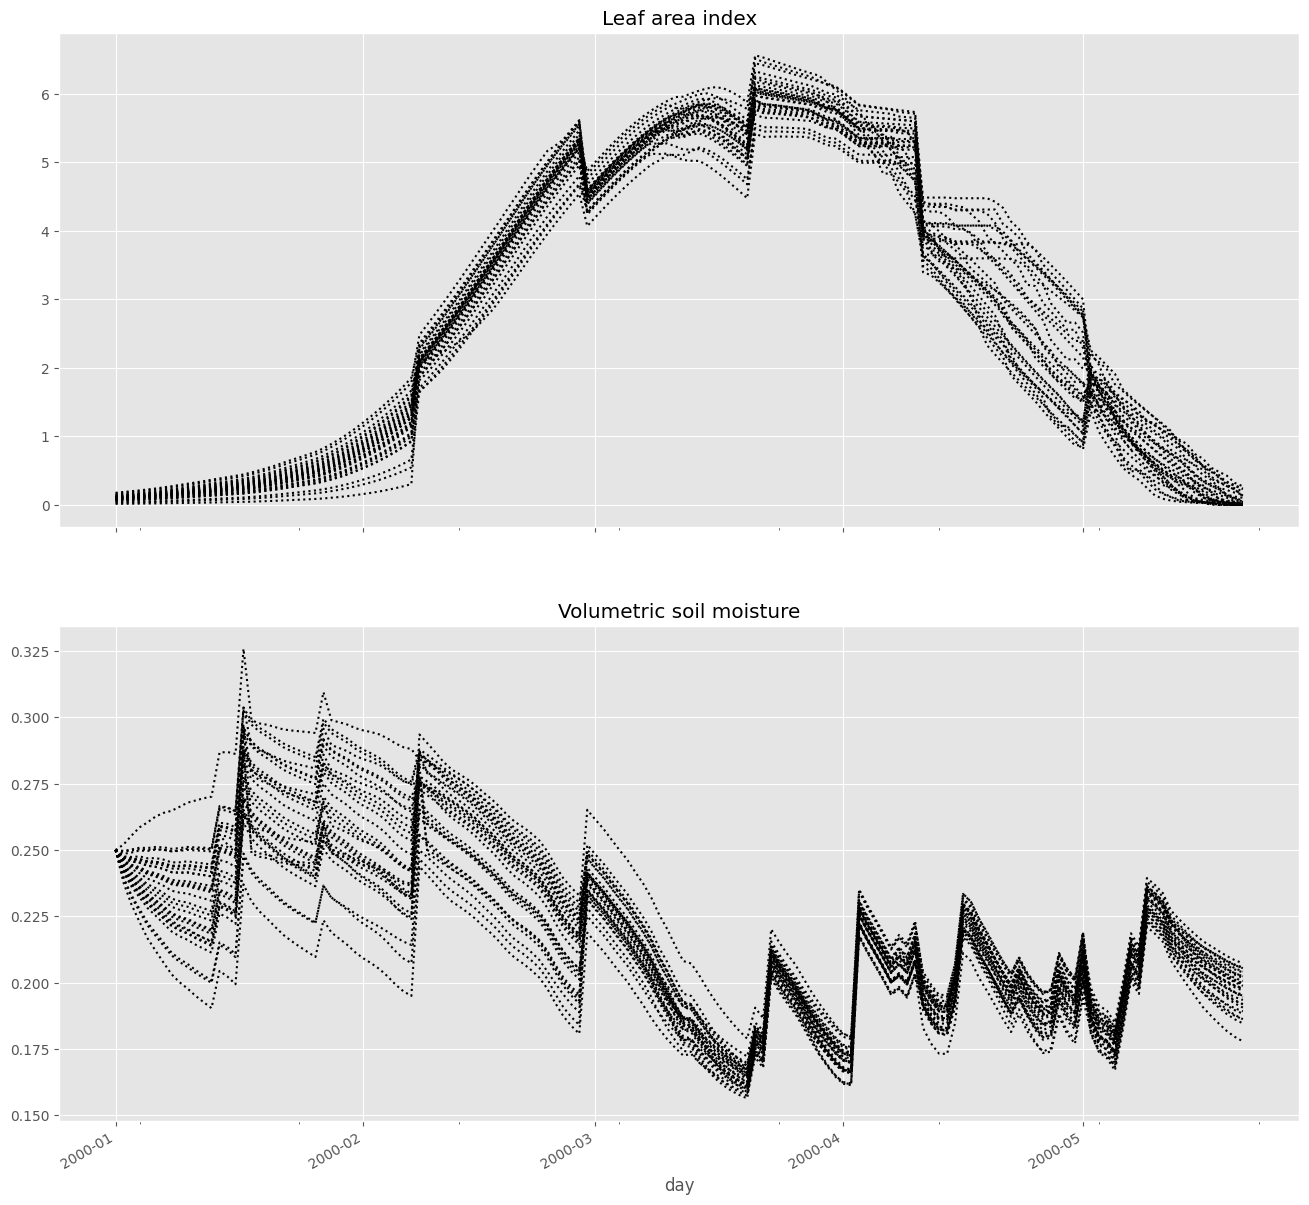

In [5]:
override_parameters = {}
# Initial conditions
ensemble_size=30
override_parameters["TDWI"] = np.random.normal(150., 50., (ensemble_size))
override_parameters["WAV"] = np.random.normal(4.5, 1.5, (ensemble_size))
# parameters
override_parameters["SPAN"] = np.random.normal(31, 3 ,(ensemble_size))
override_parameters["SMFCF"] = np.random.normal(0.31, 0.03 ,(ensemble_size))

k = KalmanWofostDA(parameters, weather, agromanagement, ensemble_size, override_parameters)
for obs in observations_for_DA:
    k.assimilate(obs)
print(len(k.ensemble))
k.moveForward(20)
k.displayLAIsM()

Démo: génération de données

parameters edited in ['p']


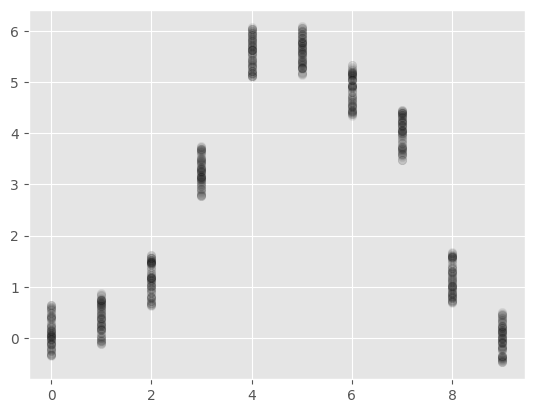

In [6]:
import data_gen

my_model = data_gen.DataGenerator(randomness=1)
my_data = my_model.generateLargeDataTimeSeries(nbOfIter=100,nb_points=10)

for col in my_data.columns:
    plt.scatter(range(len(my_data[col])),my_data[col],label=col,color='black',alpha=0.05)
plt.show()

